<a href="https://colab.research.google.com/github/programacaodinamica/analise-dados/blob/master/notebooks/Analise_Tendencia_Eleicoes_Municipais_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('vn7nlospNSU', width=640, height=360)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -U plotly

In [4]:
!pip install geopandas

In [5]:
#Importando pacotes necessários
import os
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Os arquivos utilizados na análise a seguir estão disponíveis nos links:
1. [Repositório de Dados Eleitorais](https://dadosabertos.tse.jus.br/dataset/?tags=Ano+2024)
2. [Partidos 2024](https://github.com/programacaodinamica/analise-dados/blob/master/dados/partidos2024.csv)
3. [Brasil ShapeFile](https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_Municipios_2022.zip)

In [6]:
#Caminho para os arquivos utilizados
pasta = '/content/drive/MyDrive/Colab Datasets/eleicoes/'
arquivo_resultado_2024 = os.path.join(pasta, 'votacao_candidato_munzona_2024.zip')
arquivo_resultado_2020 = os.path.join(pasta, 'votacao_candidato_munzona_2020.zip')
arquivo_resultado_2016 = os.path.join(pasta, 'votacao_candidato_munzona_2016.zip')
arquivo_partidos_2024 = os.path.join(pasta,'partidos2024.csv')
arquivo_BR_municipios_shapefile = os.path.join(pasta, 'BR_Municipios_2022/BR_Municipios_2022.shp')

In [7]:
#alterando formato de exibição dos gráficos do Pandas
pd.options.plotting.backend = 'plotly'

In [8]:
#variáveis globais
LOCAL = 'BRASIL' # Recebe a sigla da UF ou BRASIL
TIPO_CANDIDATO = 'Prefeito' #Recebe Vereador pu Prefeito

In [9]:
with ZipFile(arquivo_resultado_2024) as z:
  with z.open(f'votacao_candidato_munzona_2024_{LOCAL}.csv') as f:
    resultado_2024 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

In [10]:
with ZipFile(arquivo_resultado_2020) as z:
  with z.open(f'votacao_candidato_munzona_2020_{LOCAL}.csv') as f:
    resultado_2020 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

In [11]:
with ZipFile(arquivo_resultado_2016) as z:
  with z.open(f'votacao_candidato_munzona_2016_{LOCAL}.csv') as f:
    resultado_2016 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

In [12]:
resultado_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719061 entries, 0 to 719060
Data columns (total 50 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   DT_GERACAO                 719061 non-null  object
 1   HH_GERACAO                 719061 non-null  object
 2   ANO_ELEICAO                719061 non-null  int64 
 3   CD_TIPO_ELEICAO            719061 non-null  int64 
 4   NM_TIPO_ELEICAO            719061 non-null  object
 5   NR_TURNO                   719061 non-null  int64 
 6   CD_ELEICAO                 719061 non-null  int64 
 7   DS_ELEICAO                 719061 non-null  object
 8   DT_ELEICAO                 719061 non-null  object
 9   TP_ABRANGENCIA             719061 non-null  object
 10  SG_UF                      719061 non-null  object
 11  SG_UE                      719061 non-null  int64 
 12  NM_UE                      719061 non-null  object
 13  CD_MUNICIPIO               719061 non-null  

In [13]:
partidos = pd.read_csv(arquivo_partidos_2024, sep=';')

In [14]:
partidos

Espectro  SG_PARTIDO_TR     SG_PARTIDO  NR_PARTIDO
0     centro         AVANTE         AVANTE          70
1    direita             DC             DC          27
2    direita            DEM            DEM          25
3     centro            MDB            MDB          15
4    direita           NOVO           NOVO          30
5    direita       PATRIOTA       PATRIOTA          51
6   esquerda            PCB            PCB          21
7   esquerda          PCDOB        PC do B          65
8   esquerda            PCO            PCO          29
9   esquerda            PDT            PDT          12
10   direita             PL             PL          22
11   direita            PMB            PMB          35
12  esquerda            PMN            PMN          33
13   direita           PODE           PODE          19
14   direita             PP             PP          11
15  esquerda      CIDADANIA      CIDADANIA          23
16   direita   REPUBLICANOS   REPUBLICANOS          10
17    centro           PROS           PROS          90
18   direita           PRTB           PRTB          28
19  esquerda            PSB            PSB          40
20   direita            PSC            PSC          20
21   direita            PSD            PSD          55
22    centro           PSDB           PSDB          45
23   direita            PSL            PSL          17
24  esquerda           PSOL           PSOL          50
25  esquerda           PSTU           PSTU          16
26  esquerda             PT             PT          13
27   direita            PTB            PTB          14
28   direita            PTC            PTC          36
29  esquerda             PV             PV          43
30  esquerda           REDE           REDE          18
31    centro  SOLIDARIEDADE  SOLIDARIEDADE          77
32   direita          UNIÃO          UNIÃO          44
33  esquerda             UP             UP          80

In [15]:
espec_type = pd.CategoricalDtype(categories=['direita', 'centro', 'esquerda'], ordered=True)

In [16]:
partidos['Espectro'] = partidos['Espectro'].astype(espec_type)

In [17]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Espectro       34 non-null     category
 1   SG_PARTIDO_TR  34 non-null     object  
 2   SG_PARTIDO     34 non-null     object  
 3   NR_PARTIDO     34 non-null     int64   
dtypes: category(1), int64(1), object(2)
memory usage: 1.1+ KB


In [18]:
geo_df = gpd.read_file(arquivo_BR_municipios_shapefile)

In [19]:
if LOCAL != 'BRASIL':
  geo_df = geo_df[geo_df.SIGLA_UF == LOCAL]

geo_df['NM_MUN'] = geo_df['NM_MUN'].str.upper()

In [20]:
geo_df

CD_MUN                 NM_MUN SIGLA_UF  AREA_KM2  \
0     1100015  ALTA FLORESTA D'OESTE       RO  7067.127   
1     1100023              ARIQUEMES       RO  4426.571   
2     1100031                 CABIXI       RO  1314.352   
3     1100049                 CACOAL       RO  3793.000   
4     1100056             CEREJEIRAS       RO  2783.300   
...       ...                    ...      ...       ...   
5567  5222005             VIANÓPOLIS       GO   954.115   
5568  5222054         VICENTINÓPOLIS       GO   733.794   
5569  5222203               VILA BOA       GO  1052.593   
5570  5222302          VILA PROPÍCIO       GO  2181.593   
5571  5300108               BRASÍLIA       DF  5760.784   

                                               geometry  
0     POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  
1     POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...  
2     POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...  
3     POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...  
4     POLYGON ((-60.82135 -13.1191, -60.81773 -13.12...  
...                                                 ...  
5567  POLYGON ((-48.31126 -16.84221, -48.3117 -16.84...  
5568  POLYGON ((-49.73613 -17.74427, -49.73624 -17.7...  
5569  POLYGON ((-47.0778 -15.06364, -47.07799 -15.06...  
5570  POLYGON ((-48.58713 -15.31847, -48.58714 -15.3...  
5571  POLYGON ((-48.01472 -16.04996, -48.01573 -16.0...  

[5572 rows x 5 columns]

In [21]:
resultado_2024 = resultado_2024.\
merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

In [22]:
resultado_2020 = resultado_2020.\
merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

In [23]:
resultado_2016 = resultado_2016.\
merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

# Espectro mais votado

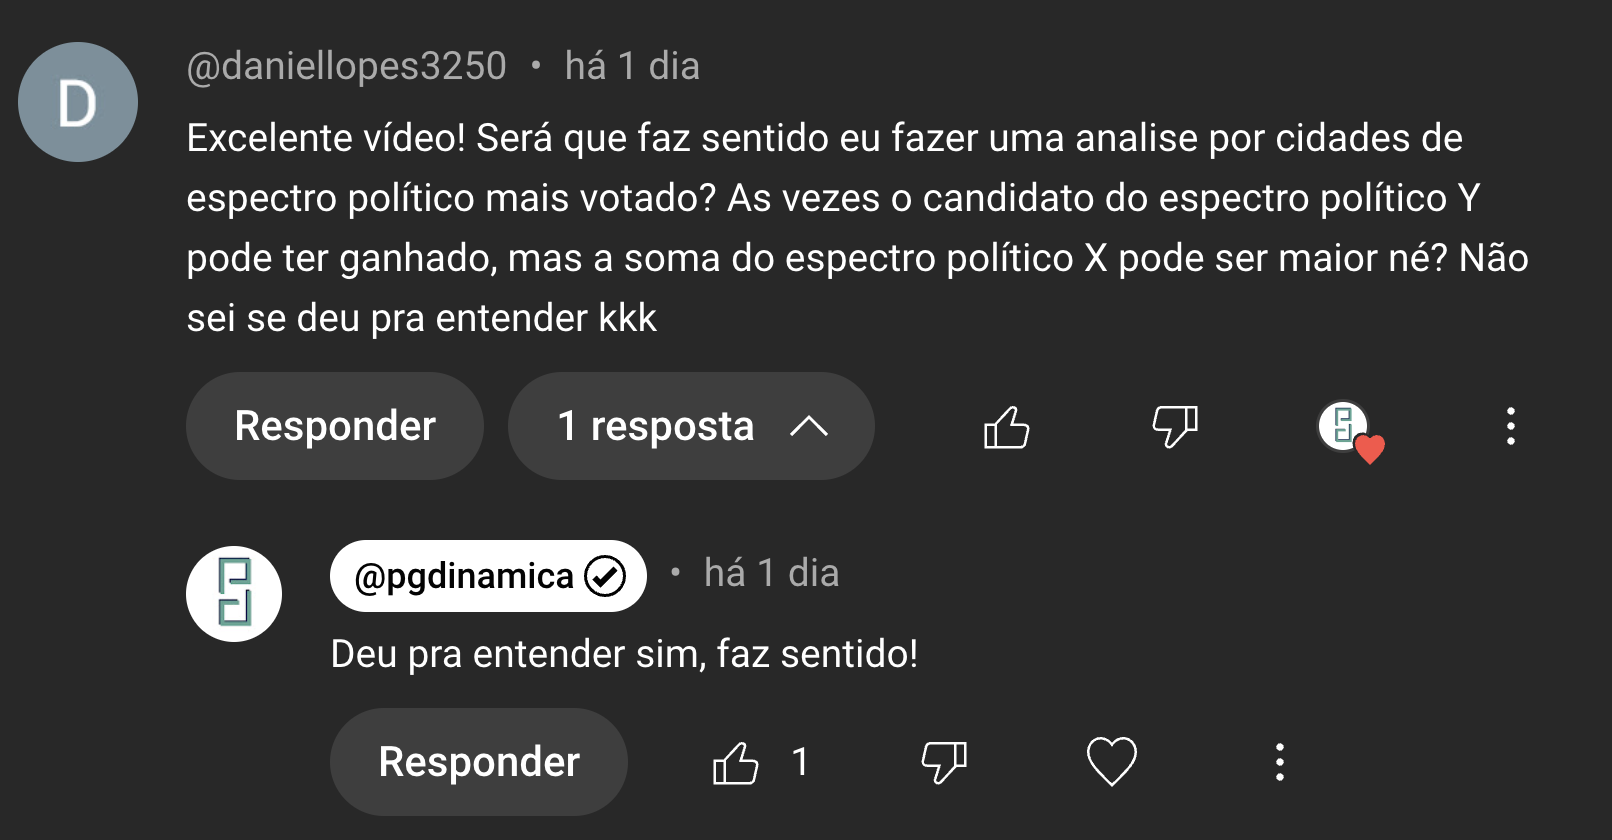

In [24]:
votos_espectro_2024 = resultado_2024[(resultado_2024['DS_CARGO']== TIPO_CANDIDATO)&(resultado_2024['NR_TURNO']==1)].groupby(['CD_MUNICIPIO','Espectro']).agg({'NM_MUNICIPIO':'first','SG_UF':'first','QT_VOTOS_NOMINAIS_VALIDOS':'sum'}).reset_index()
espectro_mais_votado_2024 = votos_espectro_2024.loc[votos_espectro_2024.groupby('CD_MUNICIPIO')['QT_VOTOS_NOMINAIS_VALIDOS'].idxmax()].reset_index(drop=True)
espectro_mais_votado_2024

<ipython-input-24-e69ef1f95bd8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votos_espectro_2024 = resultado_2024[(resultado_2024['DS_CARGO']== TIPO_CANDIDATO)&(resultado_2024['NR_TURNO']==1)].groupby(['CD_MUNICIPIO','Espectro']).agg({'NM_MUNICIPIO':'first','SG_UF':'first','QT_VOTOS_NOMINAIS_VALIDOS':'sum'}).reset_index()


CD_MUNICIPIO Espectro           NM_MUNICIPIO SG_UF  \
0               19  direita          GUAJARÁ-MIRIM    RO   
1               35  direita            PORTO VELHO    RO   
2               51  direita              JI-PARANÁ    RO   
3               78  direita              ARIQUEMES    RO   
4               94  direita                 CACOAL    RO   
...            ...      ...                    ...   ...   
5562         98990  direita              VILA RICA    MT   
5563         99015  direita               COMODORO    MT   
5564         99031  direita  FIGUEIRÓPOLIS D OESTE    MT   
5565         99058  direita      GUARANTÃ DO NORTE    MT   
5566         99074  direita               INDIAVAÍ    MT   

      QT_VOTOS_NOMINAIS_VALIDOS  
0                         14609  
1                        179843  
2                         67486  
3                         47550  
4                         46495  
...                         ...  
5562                       9758  
5563                       8647  
5564                       1312  
5565                       9166  
5566                       1461  

[5567 rows x 5 columns]

In [25]:
votos_espectro_2020 = resultado_2020[(resultado_2020['DS_CARGO']== TIPO_CANDIDATO)&(resultado_2020['NR_TURNO']==1)].groupby(['CD_MUNICIPIO','Espectro']).agg({'NM_MUNICIPIO':'first','SG_UF':'first','QT_VOTOS_NOMINAIS_VALIDOS':'sum'}).reset_index()
espectro_mais_votado_2020 = votos_espectro_2020.loc[votos_espectro_2020.groupby('CD_MUNICIPIO')['QT_VOTOS_NOMINAIS_VALIDOS'].idxmax()].reset_index(drop=True)
espectro_mais_votado_2020

<ipython-input-25-2479b0734657>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votos_espectro_2020 = resultado_2020[(resultado_2020['DS_CARGO']== TIPO_CANDIDATO)&(resultado_2020['NR_TURNO']==1)].groupby(['CD_MUNICIPIO','Espectro']).agg({'NM_MUNICIPIO':'first','SG_UF':'first','QT_VOTOS_NOMINAIS_VALIDOS':'sum'}).reset_index()


CD_MUNICIPIO Espectro           NM_MUNICIPIO SG_UF  \
0               19  direita          GUAJARÁ-MIRIM    RO   
1               35   centro            PORTO VELHO    RO   
2               51  direita              JI-PARANÁ    RO   
3               78  direita              ARIQUEMES    RO   
4               94  direita                 CACOAL    RO   
...            ...      ...                    ...   ...   
5562         98990  direita              VILA RICA    MT   
5563         99015  direita               COMODORO    MT   
5564         99031  direita  FIGUEIRÓPOLIS D OESTE    MT   
5565         99058  direita      GUARANTÃ DO NORTE    MT   
5566         99074  direita               INDIAVAÍ    MT   

      QT_VOTOS_NOMINAIS_VALIDOS  
0                          9187  
1                        124943  
2                         25004  
3                         25759  
4                         39031  
...                         ...  
5562                       5552  
5563                       6843  
5564                       2471  
5565                       9695  
5566                       1547  

[5567 rows x 5 columns]

In [26]:
espectro_mais_votado_2024_geo_df = geo_df.merge(espectro_mais_votado_2024, left_on='NM_MUN', right_on='NM_MUNICIPIO')
espectro_mais_votado_2020_geo_df = geo_df.merge(espectro_mais_votado_2020, left_on='NM_MUN', right_on='NM_MUNICIPIO')

<Axes: title={'center': 'Espectro Mais Votado BRASIL 2024 (Prefeito)'}>

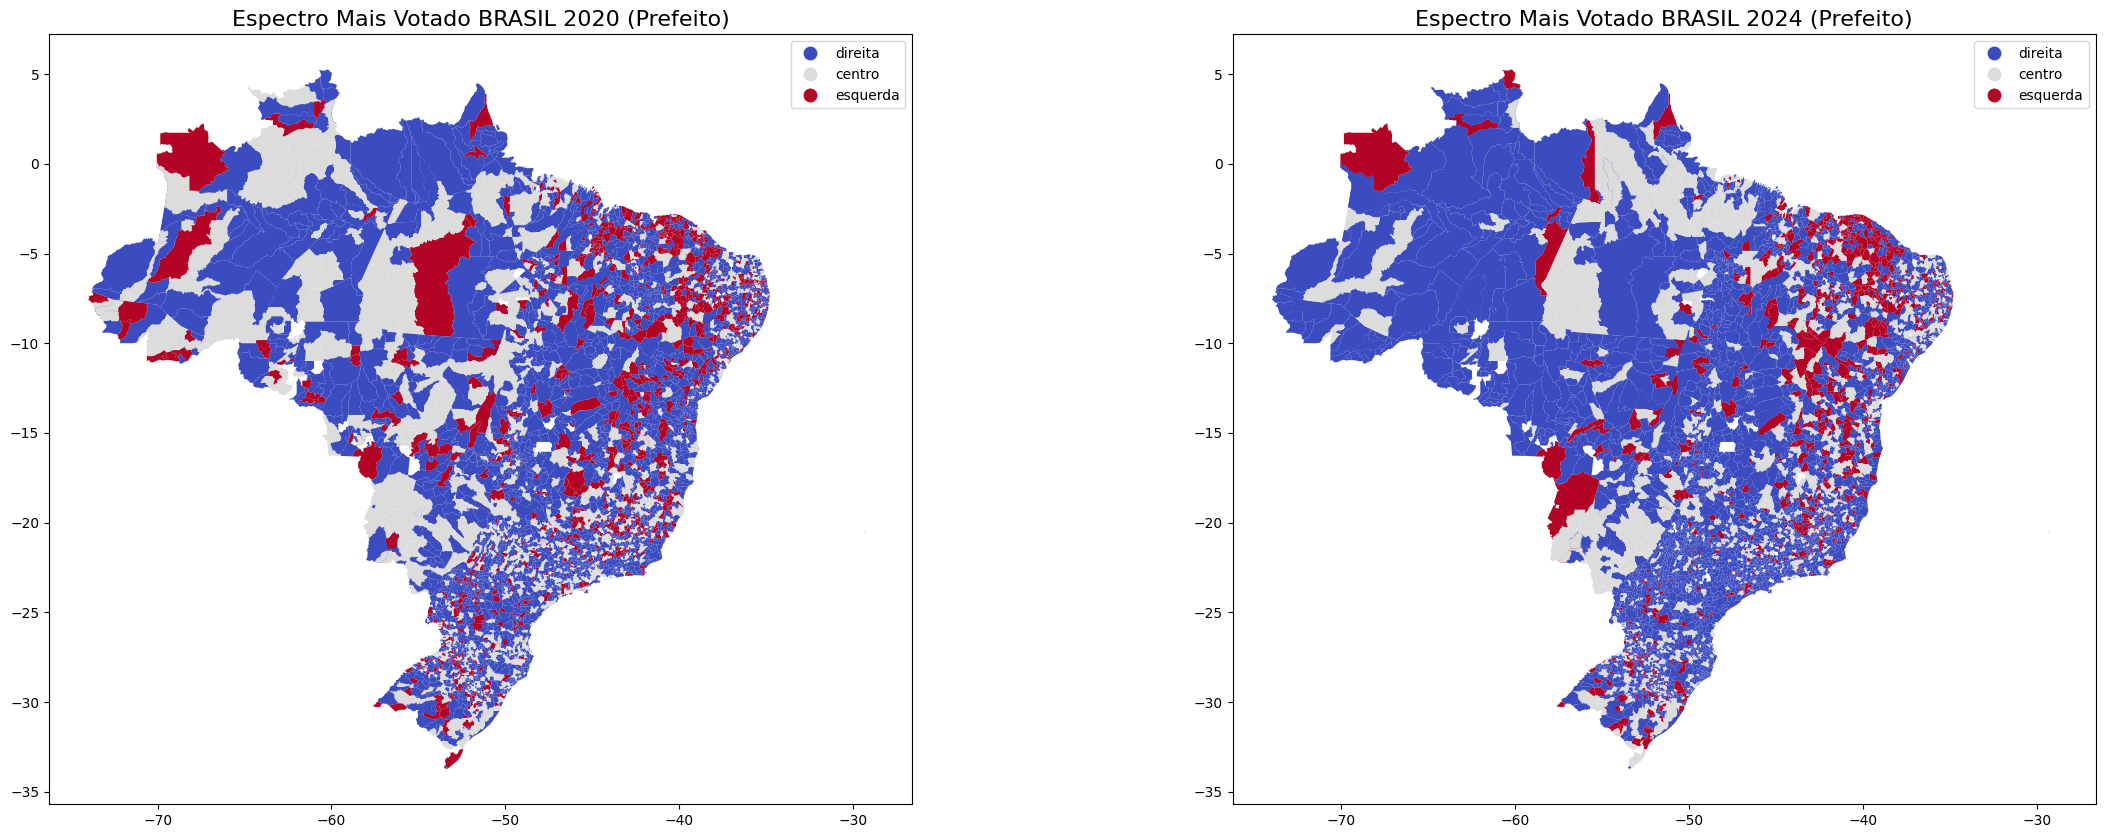

In [27]:
fig, ax = plt.subplots(1,2,figsize=(28,10))
ax[0].set_title(f'Espectro Mais Votado {LOCAL} 2020 ({TIPO_CANDIDATO})', color='black', size=16)
ax[1].set_title(f'Espectro Mais Votado {LOCAL} 2024 ({TIPO_CANDIDATO})', color='black', size=16)

espectro_mais_votado_2020_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[0])
espectro_mais_votado_2024_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[1])

# Espectro do candidato mais votado

In [28]:
candidatos_mais_votados_2024 = resultado_2024[(resultado_2024['DS_CARGO']== TIPO_CANDIDATO)&(resultado_2024['NR_TURNO']== 1)]\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'Espectro' :'first','NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first',
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

In [29]:
candidatos_mais_votados_2024

Espectro  NM_URNA_CANDIDATO    NM_MUNICIPIO  \
NR_CANDIDATO NM_UE                                                         
55           RIO DE JANEIRO   direita       EDUARDO PAES  RIO DE JANEIRO   
15           SÃO PAULO         centro      RICARDO NUNES       SÃO PAULO   
44           SALVADOR         direita         BRUNO REIS        SALVADOR   
40           RECIFE          esquerda        JOÃO CAMPOS          RECIFE   
22           FORTALEZA        direita    ANDRÉ FERNANDES       FORTALEZA   
...                               ...                ...             ...   
45           BENTO DE ABREU    centro  TEREZINHA SALESSE  BENTO DE ABREU   
15           MONJOLOS          centro        PAULO ZILLE        MONJOLOS   
22           FERNÃO           direita               BILL          FERNÃO   
44           PITANGUEIRAS     direita          ALEX REIS    PITANGUEIRAS   
40           JAPURÁ          esquerda       DR. REGILDO           JAPURÁ   

                             CD_MUNICIPIO DS_SIT_TOT_TURNO  NR_PARTIDO  \
NR_CANDIDATO NM_UE                                                       
55           RIO DE JANEIRO         60011           ELEITO          55   
15           SÃO PAULO              71072         2º TURNO          15   
44           SALVADOR               38490           ELEITO          44   
40           RECIFE                 25313           ELEITO          40   
22           FORTALEZA              13897         2º TURNO          22   
...                                   ...              ...         ...   
45           BENTO DE ABREU         62235           ELEITO          45   
15           MONJOLOS               48496           ELEITO          15   
22           FERNÃO                 62286           ELEITO          22   
44           PITANGUEIRAS           74667       NÃO ELEITO          44   
40           JAPURÁ                  2453       NÃO ELEITO          40   

                            SG_PARTIDO  QT_VOTOS_NOMINAIS  
NR_CANDIDATO NM_UE                                         
55           RIO DE JANEIRO        PSD            1861856  
15           SÃO PAULO             MDB            1801139  
44           SALVADOR            UNIÃO            1045690  
40           RECIFE                PSB             725721  
22           FORTALEZA              PL             562305  
...                                ...                ...  
45           BENTO DE ABREU       PSDB                637  
15           MONJOLOS              MDB                589  
22           FERNÃO                 PL                522  
44           PITANGUEIRAS        UNIÃO                317  
40           JAPURÁ                PSB                 15  

[5557 rows x 8 columns]

In [30]:
candidatos_mais_votados_2020 = resultado_2020[(resultado_2020['DS_CARGO']== TIPO_CANDIDATO) & (resultado_2020['NR_TURNO']== 1)]\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'Espectro' :'first','NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first',
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

In [31]:
candidatos_mais_votados_2020

Espectro NM_URNA_CANDIDATO  \
NR_CANDIDATO NM_UE                                            
45           SÃO PAULO             centro       BRUNO COVAS   
25           RIO DE JANEIRO       direita      EDUARDO PAES   
55           BELO HORIZONTE       direita             KALIL   
25           SALVADOR             direita        BRUNO REIS   
             CURITIBA             direita      RAFAEL GRECA   
...                                   ...               ...   
11           SERRA NOVA DOURADA   direita        ELSON MARÁ   
25           TURMALINA            direita           CALIXTO   
50           PLANALTO            esquerda   JOAQUIM AZEVEDO   
40           BOM JESUS           esquerda  ENIO BARBEIRINHO   
50           BOM JESUS           esquerda       IRMÃO MAZIM   

                                       NM_MUNICIPIO  CD_MUNICIPIO  \
NR_CANDIDATO NM_UE                                                  
45           SÃO PAULO                    SÃO PAULO         71072   
25           RIO DE JANEIRO          RIO DE JANEIRO         60011   
55           BELO HORIZONTE          BELO HORIZONTE         41238   
25           SALVADOR                      SALVADOR         38490   
             CURITIBA                      CURITIBA         75353   
...                                             ...           ...   
11           SERRA NOVA DOURADA  SERRA NOVA DOURADA         90921   
25           TURMALINA                    TURMALINA         72079   
50           PLANALTO                      PLANALTO         38016   
40           BOM JESUS                    BOM JESUS         85456   
50           BOM JESUS                    BOM JESUS         10375   

                                DS_SIT_TOT_TURNO  NR_PARTIDO SG_PARTIDO  \
NR_CANDIDATO NM_UE                                                        
45           SÃO PAULO                  2º TURNO          45       PSDB   
25           RIO DE JANEIRO             2º TURNO          25        DEM   
55           BELO HORIZONTE               ELEITO          55        PSD   
25           SALVADOR                     ELEITO          25        DEM   
             CURITIBA                     ELEITO          25        DEM   
...                                          ...         ...        ...   
11           SERRA NOVA DOURADA           ELEITO          11         PP   
25           TURMALINA                NÃO ELEITO          25        DEM   
50           PLANALTO                 NÃO ELEITO          50       PSOL   
40           BOM JESUS                NÃO ELEITO          40        PSB   
50           BOM JESUS                NÃO ELEITO          50       PSOL   

                                 QT_VOTOS_NOMINAIS  
NR_CANDIDATO NM_UE                                  
45           SÃO PAULO                     1754013  
25           RIO DE JANEIRO                 974804  
55           BELO HORIZONTE                 784307  
25           SALVADOR                       779408  
             CURITIBA                       499821  
...                                            ...  
11           SERRA NOVA DOURADA                409  
25           TURMALINA                         276  
50           PLANALTO                          163  
40           BOM JESUS                         138  
50           BOM JESUS                          97  

[5561 rows x 8 columns]

In [32]:
candidatos_mais_votados_2016 = resultado_2016[(resultado_2016['DS_CARGO']==TIPO_CANDIDATO)&(resultado_2016['NR_TURNO']== 1)]\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'Espectro' :'first','NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first',
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

In [33]:
candidatos_mais_votados_2016

Espectro   NM_URNA_CANDIDATO    NM_MUNICIPIO  \
NR_CANDIDATO NM_UE                                                          
45           SÃO PAULO         centro          JOÃO DORIA       SÃO PAULO   
25           SALVADOR         direita            ACM NETO        SALVADOR   
10           RIO DE JANEIRO   direita            CRIVELLA  RIO DE JANEIRO   
12           FORTALEZA       esquerda     ROBERTO CLAUDIO       FORTALEZA   
40           RECIFE          esquerda       GERALDO JULIO          RECIFE   
...                               ...                 ...             ...   
             NOVA VENEZA     esquerda              MATTIA     NOVA VENEZA   
10           BOM JARDIM       direita   MARCILIO DA ULFER      BOM JARDIM   
12           CANÁPOLIS       esquerda            DR. EDER       CANÁPOLIS   
45           JANDAÍRA          centro    REGINALDO DANTAS        JANDAÍRA   
23           ALVORADA        esquerda  WOLNEY DA FARMACIA        ALVORADA   

                             CD_MUNICIPIO DS_SIT_TOT_TURNO  NR_PARTIDO  \
NR_CANDIDATO NM_UE                                                       
45           SÃO PAULO              71072           ELEITO          45   
25           SALVADOR               38490           ELEITO          25   
10           RIO DE JANEIRO         60011         2º TURNO          10   
12           FORTALEZA              13897         2º TURNO          12   
40           RECIFE                 25313         2º TURNO          40   
...                                   ...              ...         ...   
             NOVA VENEZA            82279       NÃO ELEITO          40   
10           BOM JARDIM             58092       NÃO ELEITO          10   
12           CANÁPOLIS              42358       NÃO ELEITO          12   
45           JANDAÍRA               16993       NÃO ELEITO          45   
23           ALVORADA               92134       NÃO ELEITO          23   

                            SG_PARTIDO  QT_VOTOS_NOMINAIS  
NR_CANDIDATO NM_UE                                         
45           SÃO PAULO            PSDB            3085187  
25           SALVADOR              DEM             982246  
10           RIO DE JANEIRO        PRB             842201  
12           FORTALEZA             PDT             524973  
40           RECIFE                PSB             430997  
...                                ...                ...  
             NOVA VENEZA           PSB                388  
10           BOM JARDIM            PRB                375  
12           CANÁPOLIS             PDT                199  
45           JANDAÍRA             PSDB                115  
23           ALVORADA              PPS                 16  

[5557 rows x 8 columns]

In [34]:
candidatos_mais_votados_2024.SG_PARTIDO.value_counts().plot(kind='bar',title=f'Partido Mais Votados {LOCAL} 2024 ({TIPO_CANDIDATO})')

In [35]:
candidatos_mais_votados_2020.SG_PARTIDO.value_counts().plot(kind='bar',title=f'Partido Mais Votados {LOCAL} 2020 ({TIPO_CANDIDATO})')

In [36]:
candidatos_mais_votados_2016.SG_PARTIDO.value_counts().plot(kind='bar',title=f'Partido Mais Votados {LOCAL} 2016 ({TIPO_CANDIDATO})')

In [37]:
candidatos_mais_votados_2024.to_csv('prefeitos_mais_votados_1turno_2024.csv',index=False)

In [38]:
candidatos_mais_votados_2024_geo_df = geo_df.merge(candidatos_mais_votados_2024, left_on='NM_MUN', right_on='NM_MUNICIPIO')
candidatos_mais_votados_2020_geo_df = geo_df.merge(candidatos_mais_votados_2020, left_on='NM_MUN', right_on='NM_MUNICIPIO')
candidatos_mais_votados_2016_geo_df = geo_df.merge(candidatos_mais_votados_2016, left_on='NM_MUN', right_on='NM_MUNICIPIO')

<Axes: title={'center': 'Espectro Candidato Mais Votado BRASIL 2024 (Prefeito)'}>

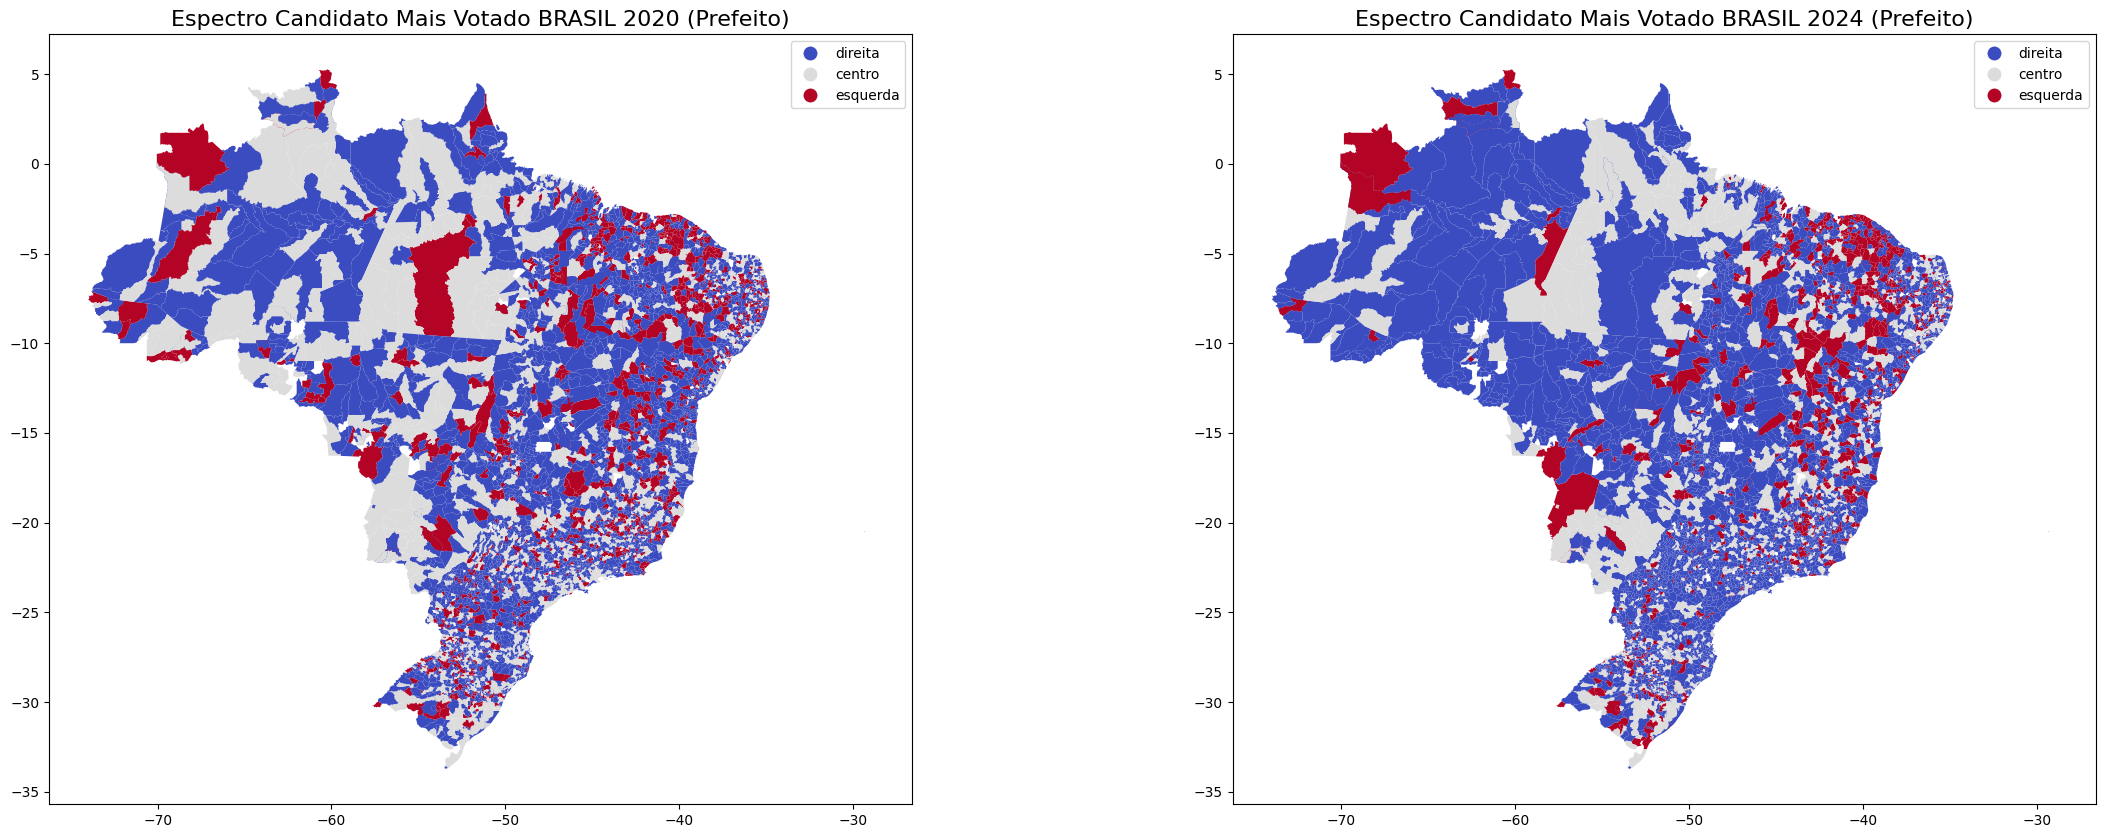

In [39]:
fig, ax = plt.subplots(1,2,figsize=(28,10))
ax[0].set_title(f'Espectro Candidato Mais Votado {LOCAL} 2020 ({TIPO_CANDIDATO})', color='black', size=16)
ax[1].set_title(f'Espectro Candidato Mais Votado {LOCAL} 2024 ({TIPO_CANDIDATO})', color='black', size=16)

candidatos_mais_votados_2020_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[0])
candidatos_mais_votados_2024_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[1])

<Axes: title={'center': 'Espectro Mais Votados BRASIL 2024 (Prefeito)'}>

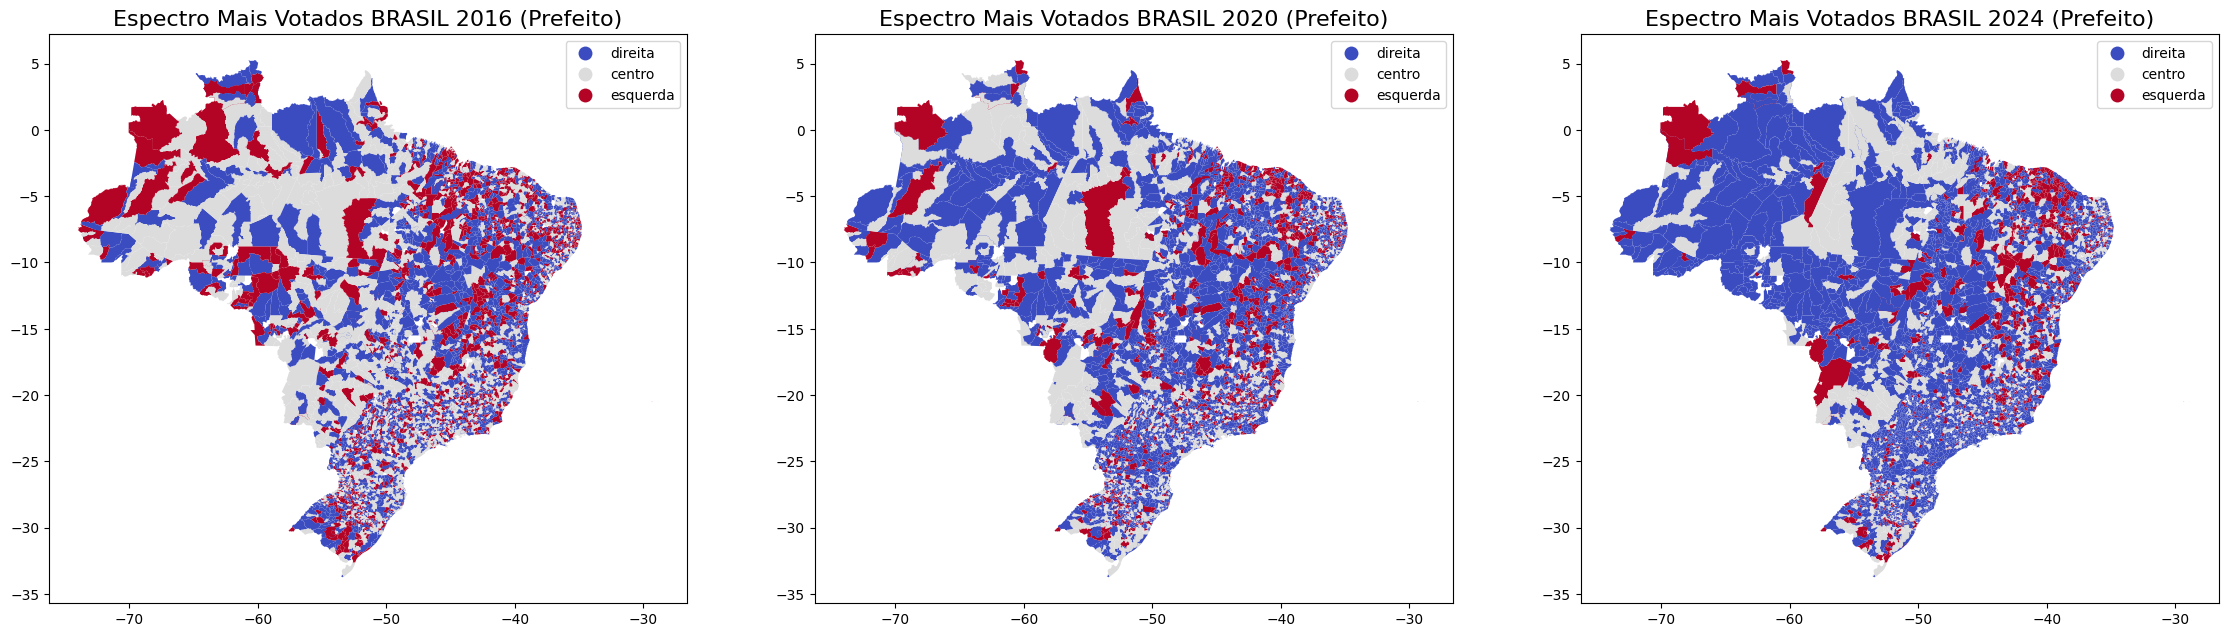

In [40]:
fig, ax = plt.subplots(1,3,figsize=(28,10))
ax[0].set_title(f'Espectro Mais Votados {LOCAL} 2016 ({TIPO_CANDIDATO})', color='black', size=16)
ax[1].set_title(f'Espectro Mais Votados {LOCAL} 2020 ({TIPO_CANDIDATO})', color='black', size=16)
ax[2].set_title(f'Espectro Mais Votados {LOCAL} 2024 ({TIPO_CANDIDATO})', color='black', size=16)

candidatos_mais_votados_2016_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[0])
candidatos_mais_votados_2020_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[1])
candidatos_mais_votados_2024_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[2])

<Axes: title={'center': 'Espectro Mais Votados BRASIL 2016 (Prefeito)'}>

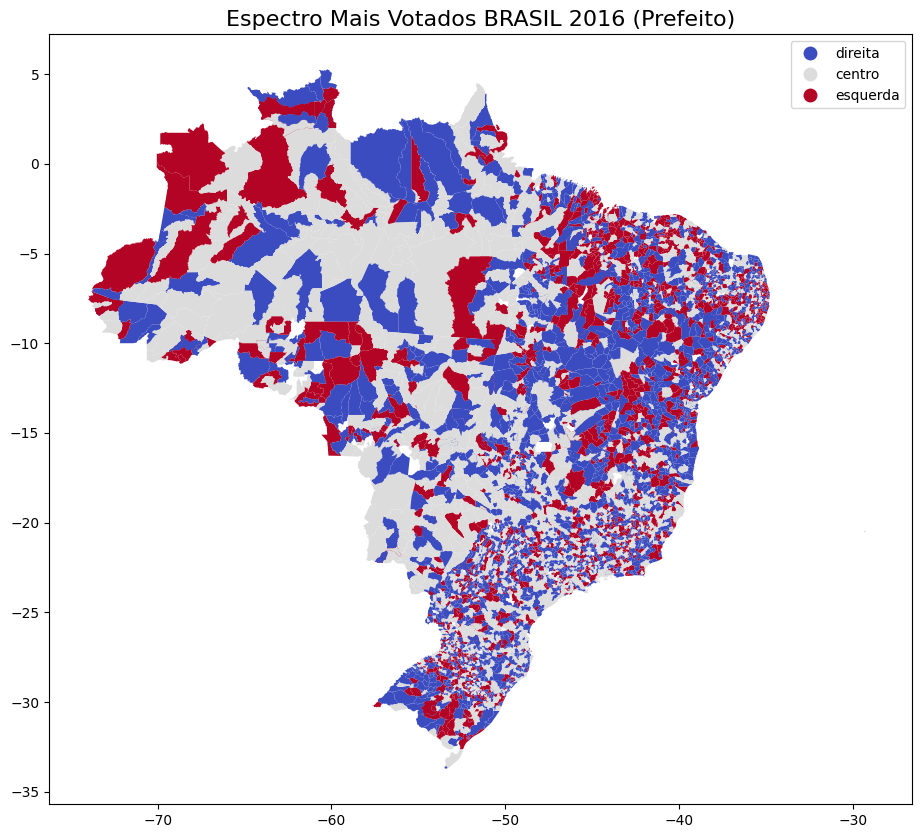

In [41]:
fig, ax = plt.subplots(1,1,figsize=(28,10))
ax.set_title(f'Espectro Mais Votados {LOCAL} 2016 ({TIPO_CANDIDATO})', color='black', size=16)

candidatos_mais_votados_2016_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax)

<Axes: title={'center': 'Espectro Mais Votados BRASIL 2020 (Prefeito)'}>

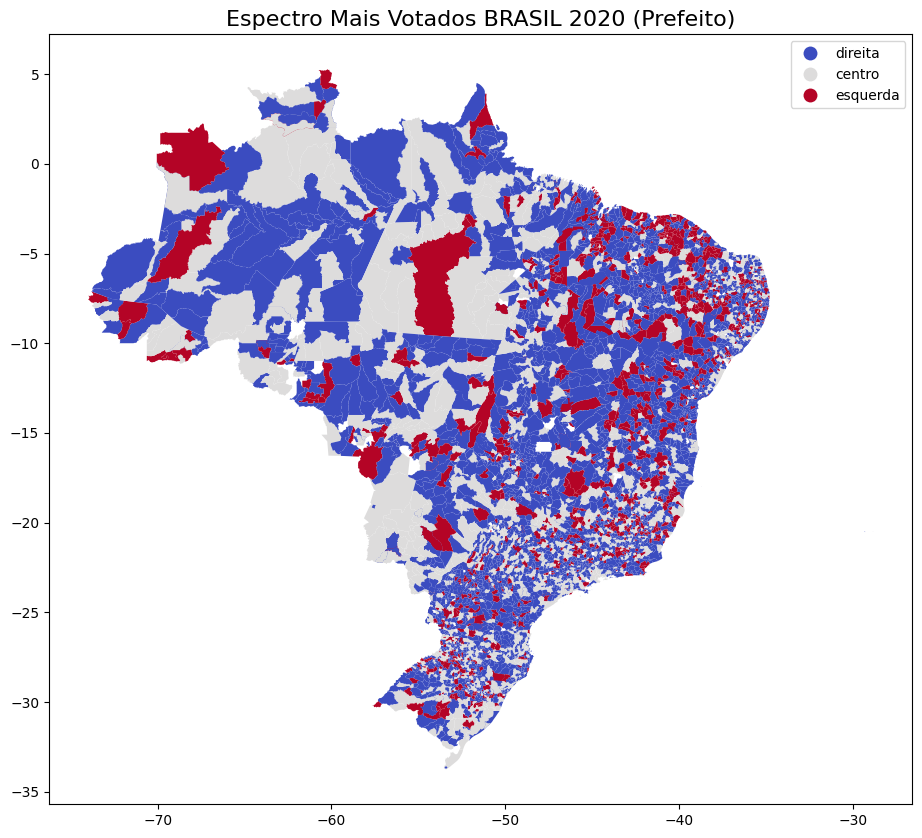

In [42]:
fig, ax = plt.subplots(1,1,figsize=(28,10))
ax.set_title(f'Espectro Mais Votados {LOCAL} 2020 ({TIPO_CANDIDATO})', color='black', size=16)

candidatos_mais_votados_2020_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax)

<Axes: title={'center': 'Espectro Mais Votados BRASIL 2024 (Prefeito)'}>

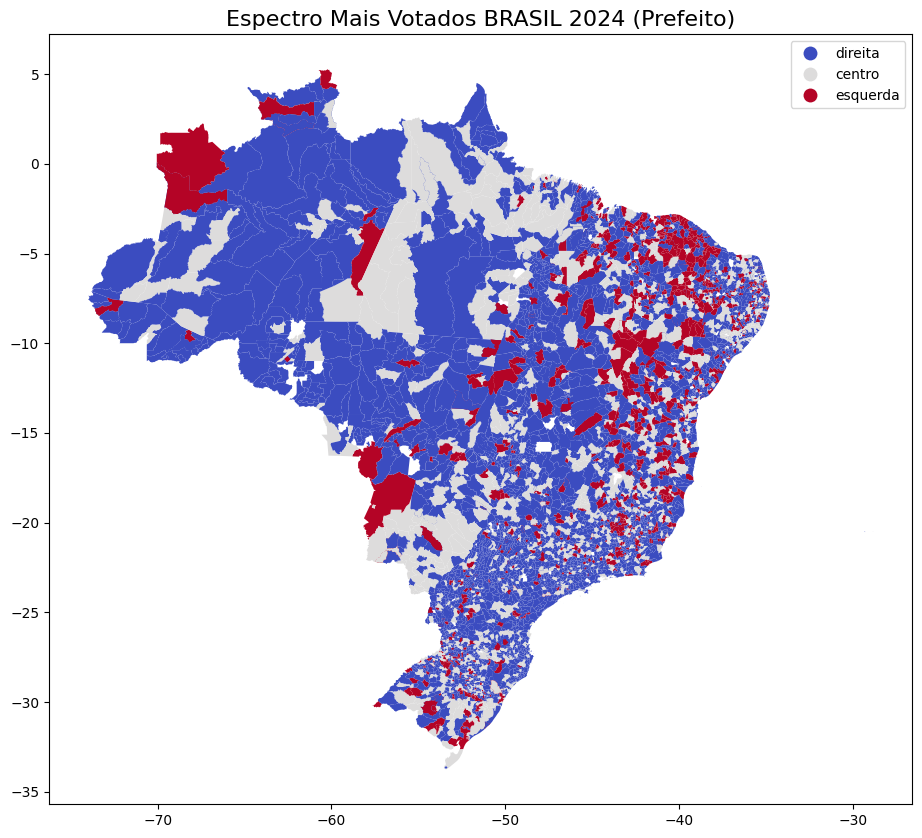

In [43]:
fig, ax = plt.subplots(1,1,figsize=(28,10))
ax.set_title(f'Espectro Mais Votados {LOCAL} 2024 ({TIPO_CANDIDATO})', color='black', size=16)

candidatos_mais_votados_2024_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax)

In [44]:
candidatos_mais_votados_2016.Espectro.value_counts().plot(kind='bar',title=f'Espectro Mais Votados {LOCAL} 2016 ({TIPO_CANDIDATO})')

In [45]:
candidatos_mais_votados_2020.Espectro.value_counts().plot(kind='bar',title=f'Espectro Mais Votados {LOCAL} 2020 ({TIPO_CANDIDATO})')

In [46]:
candidatos_mais_votados_2024.Espectro.value_counts().plot(kind='bar',title=f'Espectro Mais Votados {LOCAL} 2024 ({TIPO_CANDIDATO})')

# Comparando as abordagens

In [47]:
votos_espectro_eleitos_2020 = resultado_2020[(resultado_2020['DS_CARGO']== TIPO_CANDIDATO)&(resultado_2020['DS_SIT_TOT_TURNO']=='ELEITO')].groupby(['CD_MUNICIPIO','Espectro']).agg({'DS_SIT_TOT_TURNO':'first', 'NM_CANDIDATO':'first','NM_MUNICIPIO':'first','SG_UF':'first','QT_VOTOS_NOMINAIS_VALIDOS':'sum'}).reset_index()
espectro_eleitos_2020 = votos_espectro_eleitos_2020.loc[votos_espectro_eleitos_2020.groupby('CD_MUNICIPIO')['QT_VOTOS_NOMINAIS_VALIDOS'].idxmax()].reset_index(drop=True)
espectro_eleitos_2020.sort_values(by='QT_VOTOS_NOMINAIS_VALIDOS',ascending=False)

<ipython-input-47-6fad31218823>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



CD_MUNICIPIO  Espectro DS_SIT_TOT_TURNO                  NM_CANDIDATO  \
3694         71072    centro           ELEITO             BRUNO COVAS LOPES   
3118         60011   direita           ELEITO         EDUARDO DA COSTA PAES   
2212         41238   direita           ELEITO               ALEXANDRE KALIL   
1997         38490   direita           ELEITO             BRUNO SOARES REIS   
811          13897  esquerda           ELEITO   JOSÉ SARTO NOGUEIRA MOREIRA   
...            ...       ...              ...                           ...   
3262         62430   direita           ELEITO         LUIZ CARLOS RODRIGUES   
3748         72150  esquerda           ELEITO  KENDREA ALVES PAPILE CAVATÃO   
4035         76457   direita           ELEITO       LUCIMAR DE SOUZA MORAIS   
5048         90239   direita           ELEITO     FRANCISCO GONÇALVES NAVES   
5117         90921   direita           ELEITO         ELSON FARIAS DE SOUSA   

            NM_MUNICIPIO SG_UF  QT_VOTOS_NOMINAIS_VALIDOS  
3694           SÃO PAULO    SP                    3169121  
3118      RIO DE JANEIRO    RJ                    1629319  
2212      BELO HORIZONTE    MG                     784307  
1997            SALVADOR    BA                     779408  
811            FORTALEZA    CE                     668652  
...                  ...   ...                        ...  
3262                BORÁ    SP                        501  
3748      UNIÃO PAULISTA    SP                        490  
4035       JARDIM OLINDA    PR                        470  
5048          ARAGUAINHA    MT                        464  
5117  SERRA NOVA DOURADA    MT                        409  

[5564 rows x 7 columns]

In [48]:
espectro_eleitos_2020_geo_df = geo_df.merge(espectro_eleitos_2020, left_on='NM_MUN', right_on='NM_MUNICIPIO')

<Axes: title={'center': 'Espectro Candidatos Mais Votados BRASIL 2020 (Prefeito)'}>

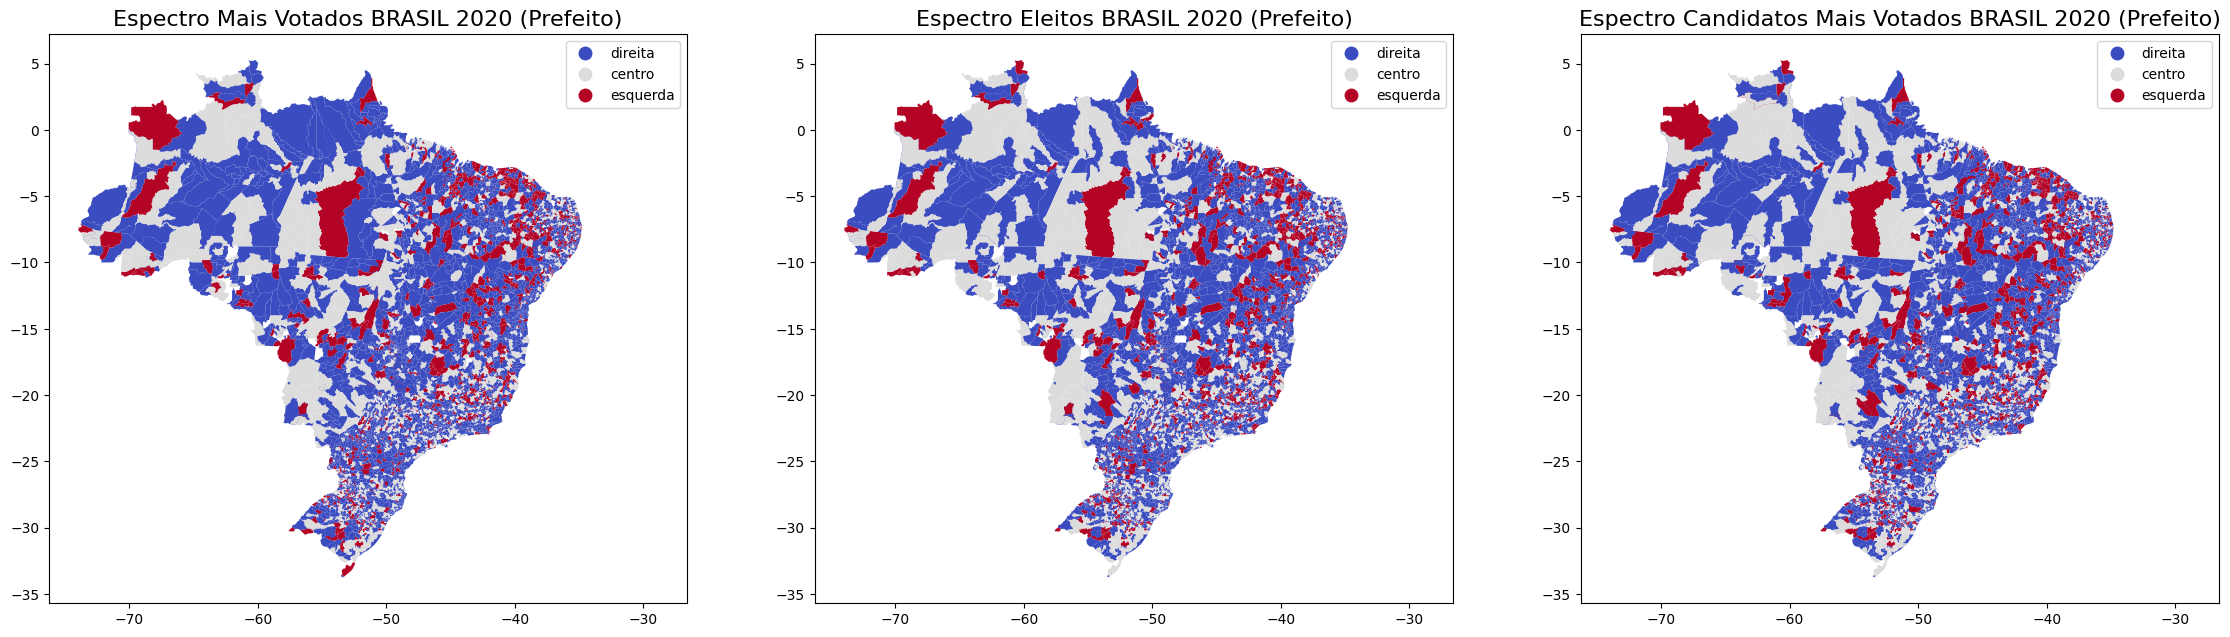

In [49]:
fig, ax = plt.subplots(1,3,figsize=(28,10))
ax[0].set_title(f'Espectro Mais Votados {LOCAL} 2020 ({TIPO_CANDIDATO})', color='black', size=16)
ax[1].set_title(f'Espectro Eleitos {LOCAL} 2020 ({TIPO_CANDIDATO})', color='black', size=16)
ax[2].set_title(f'Espectro Candidatos Mais Votados {LOCAL} 2020 ({TIPO_CANDIDATO})', color='black', size=16)

espectro_mais_votado_2020_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[0])
espectro_eleitos_2020_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[1])
candidatos_mais_votados_2020_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[2])

In [50]:
df_comparacao1 = pd.merge(espectro_mais_votado_2020_geo_df, espectro_eleitos_2020_geo_df, on=['CD_MUNICIPIO','SIGLA_UF', 'CD_MUN','NM_MUN', 'AREA_KM2'], how='outer', suffixes=('_mais_votado', '_eleitos'))

In [51]:
df_comparacao1['Espectro_Igual'] = df_comparacao1['Espectro_mais_votado'] == df_comparacao1['Espectro_eleitos']

In [52]:
df_comparacao1['Espectro_Igual'].value_counts()

Espectro_Igual
True     5718
False     437
Name: count, dtype: int64

In [53]:
df_comparacao2 = pd.merge(candidatos_mais_votados_2020_geo_df, espectro_eleitos_2020_geo_df, on=['CD_MUNICIPIO','SIGLA_UF', 'CD_MUN','NM_MUN', 'AREA_KM2'], how='outer', suffixes=('_cand_mais_votado', '_eleitos'))

In [54]:
df_comparacao2['Espectro_Igual'] = df_comparacao2['Espectro_cand_mais_votado'] == df_comparacao2['Espectro_eleitos']

In [55]:
df_comparacao2['Espectro_Igual'].value_counts()

Espectro_Igual
True     5916
False     239
Name: count, dtype: int64

# Analisando distribuição dos Vereadores Eleitos

In [56]:
vereadores_eleitos_2024 = resultado_2024[(resultado_2024['DS_CARGO']=='Vereador')&(resultado_2024['DS_SIT_TOT_TURNO'].str.contains('ELEITO POR'))]\
                    .groupby(['NR_CANDIDATO','NM_UE'])\
                    .agg({'NM_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first',
                          'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
                          'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
                    .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
                  .merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO').reset_index(drop=True)

In [57]:
vereadores_eleitos_2020 = resultado_2020[(resultado_2020['DS_CARGO']=='Vereador')&(resultado_2020['DS_SIT_TOT_TURNO'].str.contains('ELEITO POR'))]\
                    .groupby(['NR_CANDIDATO','NM_UE'])\
                    .agg({'NM_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first',
                          'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
                          'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
                    .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
                  .merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO').reset_index(drop=True)

In [58]:
vereadores_eleitos_2016 = resultado_2016[(resultado_2016['DS_CARGO']=='Vereador')&
                                         (resultado_2016['DS_SIT_TOT_TURNO'].str.contains('ELEITO POR'))]\
                    .groupby(['NR_CANDIDATO','NM_UE'])\
                    .agg({'NM_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first',
                          'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
                          'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
                    .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
                  .merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO').reset_index(drop=True)

In [59]:
vereadores_eleitos_2016.Espectro.value_counts().plot(kind='bar',title='Espectro Vereadores Eleitos 2016')

In [60]:
vereadores_eleitos_2020.Espectro.value_counts().plot(kind='bar',title='Espectro Vereadores Eleitos 2020')

In [61]:
vereadores_eleitos_2024.Espectro.value_counts().plot(kind='bar',title='Espectro Vereadores Eleitos 2024')